In [1]:
! pip install pandas

In [2]:
import pandas as pd

In [3]:
! ls

bin	initrd.img	miniconda			  run	var
boot	initrd.img.old	Miniconda3-4.5.4-Linux-x86_64.sh  sbin	vmlinuz
dev	lib		mnt				  srv	vmlinuz.old
etc	lib64		opt				  sys
hadoop	lost+found	proc				  tmp
home	media		root				  usr


In [4]:
! ls usr

bin  games  include  lib  local  sbin  share  src


In [5]:
! hdfs dfs -ls /user

Found 9 items
drwxrwxrwt   - hdfs hadoop          0 2019-07-30 13:05 /user/hbase
drwxrwxrwt   - hdfs hadoop          0 2019-07-30 13:05 /user/hdfs
drwxrwxrwt   - hdfs hadoop          0 2019-07-30 13:05 /user/hive
drwxrwxrwt   - hdfs hadoop          0 2019-07-30 13:05 /user/mapred
drwxrwxrwt   - hdfs hadoop          0 2019-07-30 13:05 /user/pig
drwxr-xr-x   - root hadoop          0 2019-07-30 13:23 /user/root
drwxrwxrwt   - hdfs hadoop          0 2019-07-30 13:05 /user/spark
drwxrwxrwt   - hdfs hadoop          0 2019-07-30 13:05 /user/yarn
drwxrwxrwt   - hdfs hadoop          0 2019-07-30 13:05 /user/zookeeper


In [6]:
! pip install --upgrade google-cloud-bigquery[pandas]

Requirement already up-to-date: google-cloud-bigquery[pandas] in /opt/conda/lib/python3.6/site-packages (1.17.0)


In [7]:
%load_ext google.cloud.bigquery

In [8]:
%%bigquery waste_df
SELECT *
FROM `propane-service-242706.demo_dataset.waste_austin4`

In [9]:
type(waste_df)

pandas.core.frame.DataFrame

In [10]:
waste_df

,load_id,report_date,load_type,load_time,load_weight,dropoff_site,route_type,route_number,TX,load_d,...,group_tx,c,auto,load_doy,load_w,is_sat,load_d2,load_m2,auto2,group_tx2
0,554631,2012-12-31,RECYCLING - SINGLE STREAM,2012-12-31 14:07:00+00:00,8840,TDS - MRF,RECYCLING - SINGLE STREAM,RMAU23,78610,31,...,9,3,1,366,53,0,31,12,1,9
1,554617,2012-12-31,RECYCLING - SINGLE STREAM,2012-12-31 10:30:00+00:00,12940,TDS - MRF,RECYCLING - SINGLE STREAM,RMAU21,78610,31,...,9,3,1,366,53,0,31,12,1,9
2,554634,2012-12-31,RECYCLING - SINGLE STREAM,2012-12-31 14:16:00+00:00,7500,TDS - MRF,RECYCLING - SINGLE STREAM,RMAU24,78610,31,...,9,3,1,366,53,0,31,12,1,9
3,554666,2012-12-31,RECYCLING - SINGLE STREAM,2012-12-31 14:13:00+00:00,11700,TDS - MRF,RECYCLING - SINGLE STREAM,RMAU16,78610,31,...,9,3,1,366,53,0,31,12,1,9
4,554466,2012-12-31,RECYCLING - SINGLE STREAM,2012-12-31 02:27:00+00:00,6060,TDS - MRF,RECYCLING - SINGLE STREAM,RMAS42,78610,31,...,9,3,1,366,53,0,31,12,1,9
5,554489,2012-12-31,RECYCLING - SINGLE STREAM,2012-12-31 12:21:00+00:00,12200,TDS - MRF,RECYCLING - SINGLE STREAM,RMAS33,78610,31,...,9,3,1,366,53,0,31,12,1,9
6,554469,2012-12-31,RECYCLING - SINGLE STREAM,2012-12-31 11:15:00+00:00,11200,TDS - MRF,RECYCLING - SINGLE STREAM,RMAS43,78610,31,...,9,3,1,366,53,0,31,12,1,9
7,554616,2012-12-31,RECYCLING - SINGLE STREAM,2012-12-31 14:33:00+00:00,8160,TDS - MRF,RECYCLING - SINGLE STREAM,RMAU20,78610,31,...,9,3,1,366,53,0,31,12,1,9
8,554501,2012-12-31,RECYCLING - SINGLE STREAM,2012-12-31 14:10:00+00:00,1540,TDS - MRF,INHOUSE - RECYCLING,IRM1,78610,31,...,9,3,0,366,53,0,31,12,0,9
9,554493,2012-12-31,RECYCLING - SINGLE STREAM,2012-12-31 11:55:00+00:00,19820,TDS - MRF,RECYCLING - SINGLE STREAM,RMAS34,78610,31,...,9,3,1,366,53,0,31,12,1,9


In [11]:
%matplotlib inline

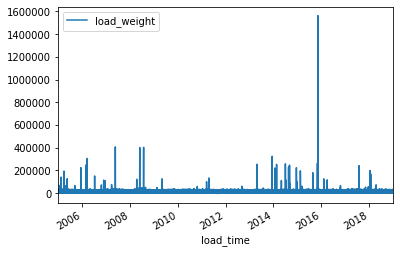

In [12]:
waste_df.plot(x='load_time',y='load_weight')

In [13]:
waste_df.describe()

,load_id,load_weight,TX,load_d,load_dof,load_m,load_y,load_h,load_min,group_tx,c,auto,load_doy,load_w,is_sat
count,538065.000000,5.380650e+05,538065.000000,538065.000000,538065.000000,538065.000000,538065.000000,538065.000000,538065.000000,538065.000000,538065.000000,538065.000000,538065.000000,538065.000000,538065.000000
mean,462987.700655,1.176262e+04,78664.325626,15.704629,3.957397,6.442157,7.335157,12.090112,27.433864,7.189782,1.480775,0.397095,180.603767,25.841865,0.016671
std,213335.703908,7.676010e+03,64.147938,8.802576,1.453369,3.439384,4.087888,3.261608,18.023961,2.180275,1.114125,0.489296,105.161367,15.028662,0.128035
min,112534.000000,-4.480000e+03,78610.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,268407.000000,5.540000e+03,78610.000000,8.000000,3.000000,3.000000,4.000000,11.000000,12.000000,5.000000,0.000000,0.000000,90.000000,13.000000,0.000000
50%,502921.000000,1.106000e+04,78610.000000,16.000000,4.000000,6.000000,7.000000,13.000000,28.000000,9.000000,1.000000,0.000000,178.000000,25.000000,0.000000
75%,656984.000000,1.670000e+04,78725.000000,23.000000,5.000000,9.000000,11.000000,14.000000,43.000000,9.000000,2.000000,1.000000,271.000000,39.000000,0.000000
max,828865.000000,1.562821e+06,78767.000000,31.000000,7.000000,12.000000,14.000000,23.000000,59.000000,9.000000,3.000000,1.000000,366.000000,53.000000,1.000000


In [14]:
w2_df=waste_df.dropna()

In [15]:
w2_df.describe()

,load_id,load_weight,TX,load_d,load_dof,load_m,load_y,load_h,load_min,group_tx,c,auto,load_doy,load_w,is_sat
count,538065.000000,5.380650e+05,538065.000000,538065.000000,538065.000000,538065.000000,538065.000000,538065.000000,538065.000000,538065.000000,538065.000000,538065.000000,538065.000000,538065.000000,538065.000000
mean,462987.700655,1.176262e+04,78664.325626,15.704629,3.957397,6.442157,7.335157,12.090112,27.433864,7.189782,1.480775,0.397095,180.603767,25.841865,0.016671
std,213335.703908,7.676010e+03,64.147938,8.802576,1.453369,3.439384,4.087888,3.261608,18.023961,2.180275,1.114125,0.489296,105.161367,15.028662,0.128035
min,112534.000000,-4.480000e+03,78610.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,268407.000000,5.540000e+03,78610.000000,8.000000,3.000000,3.000000,4.000000,11.000000,12.000000,5.000000,0.000000,0.000000,90.000000,13.000000,0.000000
50%,502921.000000,1.106000e+04,78610.000000,16.000000,4.000000,6.000000,7.000000,13.000000,28.000000,9.000000,1.000000,0.000000,178.000000,25.000000,0.000000
75%,656984.000000,1.670000e+04,78725.000000,23.000000,5.000000,9.000000,11.000000,14.000000,43.000000,9.000000,2.000000,1.000000,271.000000,39.000000,0.000000
max,828865.000000,1.562821e+06,78767.000000,31.000000,7.000000,12.000000,14.000000,23.000000,59.000000,9.000000,3.000000,1.000000,366.000000,53.000000,1.000000


In [16]:
w2_sdf = spark.createDataFrame(w2_df)

In [17]:
type(w2_sdf)

pyspark.sql.dataframe.DataFrame

In [18]:
w2_sdf.printSchema()

root
 |-- load_id: long (nullable = true)
 |-- report_date: date (nullable = true)
 |-- load_type: string (nullable = true)
 |-- load_time: timestamp (nullable = true)
 |-- load_weight: long (nullable = true)
 |-- dropoff_site: string (nullable = true)
 |-- route_type: string (nullable = true)
 |-- route_number: string (nullable = true)
 |-- TX: long (nullable = true)
 |-- load_d: long (nullable = true)
 |-- load_dof: long (nullable = true)
 |-- load_m: long (nullable = true)
 |-- load_y: long (nullable = true)
 |-- load_h: long (nullable = true)
 |-- load_min: long (nullable = true)
 |-- TX2: string (nullable = true)
 |-- group_tx: long (nullable = true)
 |-- c: long (nullable = true)
 |-- auto: long (nullable = true)
 |-- load_doy: long (nullable = true)
 |-- load_w: long (nullable = true)
 |-- is_sat: long (nullable = true)
 |-- load_d2: string (nullable = true)
 |-- load_m2: string (nullable = true)
 |-- auto2: string (nullable = true)
 |-- group_tx2: string (nullable = true)



In [19]:
def t_timeperiod(origin):
    if origin is None:
        period = None
    elif origin >= 0 and origin < 6:
        period = '00.00-05.59'
    elif origin >= 6 and origin < 12:
        period = '06.00-11.59'
    elif origin >= 12 and origin < 18:
        period = '12.00-17.59'
    elif origin >= 18 and origin < 24:
        period = '18.00-23.59'
    else:
        period = 'NA'
    return period

In [20]:
from pyspark.sql.types import *
from pyspark.sql.functions import col, udf
timeperiod = udf(lambda x: t_timeperiod(x),StringType())

In [21]:
w2_discretized_sdf = w2_sdf.withColumn('load_time_period',timeperiod(w2_sdf['load_h']))

In [22]:
w2_discretized_sdf.printSchema()

root
 |-- load_id: long (nullable = true)
 |-- report_date: date (nullable = true)
 |-- load_type: string (nullable = true)
 |-- load_time: timestamp (nullable = true)
 |-- load_weight: long (nullable = true)
 |-- dropoff_site: string (nullable = true)
 |-- route_type: string (nullable = true)
 |-- route_number: string (nullable = true)
 |-- TX: long (nullable = true)
 |-- load_d: long (nullable = true)
 |-- load_dof: long (nullable = true)
 |-- load_m: long (nullable = true)
 |-- load_y: long (nullable = true)
 |-- load_h: long (nullable = true)
 |-- load_min: long (nullable = true)
 |-- TX2: string (nullable = true)
 |-- group_tx: long (nullable = true)
 |-- c: long (nullable = true)
 |-- auto: long (nullable = true)
 |-- load_doy: long (nullable = true)
 |-- load_w: long (nullable = true)
 |-- is_sat: long (nullable = true)
 |-- load_d2: string (nullable = true)
 |-- load_m2: string (nullable = true)
 |-- auto2: string (nullable = true)
 |-- group_tx2: string (nullable = true)
 |-- 

In [23]:
w2_discretized_sdf.show(5)

+-------+-----------+--------------------+-------------------+-----------+------------+--------------------+------------+-----+------+--------+------+------+------+--------+--------+--------+---+----+--------+------+------+-------+-------+-----+---------+----------------+
|load_id|report_date|           load_type|          load_time|load_weight|dropoff_site|          route_type|route_number|   TX|load_d|load_dof|load_m|load_y|load_h|load_min|     TX2|group_tx|  c|auto|load_doy|load_w|is_sat|load_d2|load_m2|auto2|group_tx2|load_time_period|
+-------+-----------+--------------------+-------------------+-----------+------------+--------------------+------------+-----+------+--------+------+------+------+--------+--------+--------+---+----+--------+------+------+-------+-------+-----+---------+----------------+
| 554631| 2012-12-31|RECYCLING - SINGL...|2012-12-31 14:07:00|       8840|   TDS - MRF|RECYCLING - SINGL...|      RMAU23|78610|    31|       2|    12|     8|    14|       7|TX 78610

In [48]:
train_sdf,test_sdf = w2_discretized_sdf.randomSplit([0.95,0.05],seed = 12 )

In [49]:
train_sdf.count()

511137

In [50]:
test_sdf.count()

26928

In [51]:
from pyspark.ml.feature import StringIndexer,OneHotEncoder

In [52]:
load_type_ind = StringIndexer(inputCol = 'load_type',outputCol = 'load_type_ind')
load_type_ohe = OneHotEncoder(dropLast = False, inputCol = 'load_type_ind',outputCol = 'load_type_vec')

In [53]:
q_ind = StringIndexer(inputCol = 'c',outputCol = 'q_ind')
q_ohe = OneHotEncoder(dropLast = False, inputCol = 'q_ind',outputCol = 'q_vec')
auto_ind = StringIndexer(inputCol = 'auto',outputCol = 'auto_ind')
auto_ohe = OneHotEncoder(dropLast = False, inputCol = 'auto_ind',outputCol = 'auto_vec')

In [54]:
dsite_ind = StringIndexer(inputCol = 'dropoff_site',outputCol = 'dsite_ind')
dsite_ohe = OneHotEncoder(dropLast = False, inputCol = 'dsite_ind',outputCol = 'dsite_vec')

In [55]:
r_type_ind = StringIndexer(inputCol = 'route_type',outputCol = 'r_type_ind')
r_type_ohe = OneHotEncoder(dropLast = False, inputCol = 'r_type_ind',outputCol = 'r_type_vec')

In [56]:
r_number_ind = StringIndexer(inputCol = 'route_number',outputCol = 'r_number_ind')
r_number_ohe = OneHotEncoder(dropLast = False, inputCol = 'r_number_ind',outputCol = 'r_number_vec')
load_m_ind = StringIndexer(inputCol = 'load_m',outputCol = 'load_m_ind')
load_m_ohe = OneHotEncoder(dropLast = False, inputCol = 'load_m_ind',outputCol = 'load_m_vec')

In [120]:
from pyspark.mllib.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

In [121]:
featureAssembler = VectorAssembler(
inputCols = ['load_type_vec',\
             'auto_vec',\
             'dsite_vec',\
             'r_type_vec',\
             'r_number_vec',\
             'load_y',\
             'load_m',\
             'load_d',\
             'group_tx'
            ],outputCol = 'features')

In [122]:
from pyspark.ml.regression import RandomForestRegressor,DecisionTreeRegressor,GBTRegressor,LinearRegression,GeneralizedLinearRegression,IsotonicRegression

In [123]:
dt = IsotonicRegression(labelCol = 'load_weight',featuresCol = 'features')
dt1 = DecisionTreeRegressor(labelCol = 'load_weight',featuresCol = 'features')
dt2 = GBTRegressor(labelCol = 'load_weight',featuresCol = 'features')
dt3 = LinearRegression(labelCol = 'load_weight',featuresCol = 'features')
dt4 = GeneralizedLinearRegression(labelCol = 'load_weight',featuresCol = 'features')
dt5 = RandomForestRegressor(labelCol = 'load_weight',featuresCol = 'features')


In [124]:
pipeline_dt = Pipeline().\
setStages([load_type_ind,\
          load_type_ohe,\
           auto_ind,\
          auto_ohe,\
           dsite_ind,\
           dsite_ohe,\
           r_type_ind,\
           r_type_ohe,\
           r_number_ind,\
           r_number_ohe,\
           featureAssembler,dt
          ])
pipeline_dt1 = Pipeline().\
setStages([load_type_ind,\
          load_type_ohe,\
           auto_ind,\
          auto_ohe,\
           dsite_ind,\
           dsite_ohe,\
           r_type_ind,\
           r_type_ohe,\
           r_number_ind,\
           r_number_ohe,\
           featureAssembler,dt1
          ])
pipeline_dt2 = Pipeline().\
setStages([load_type_ind,\
          load_type_ohe,\
           auto_ind,\
          auto_ohe,\
           dsite_ind,\
           dsite_ohe,\
           r_type_ind,\
           r_type_ohe,\
           r_number_ind,\
           r_number_ohe,\
           featureAssembler,dt2
          ])
pipeline_dt3 = Pipeline().\
setStages([load_type_ind,\
          load_type_ohe,\
           auto_ind,\
          auto_ohe,\
           dsite_ind,\
           dsite_ohe,\
           r_type_ind,\
           r_type_ohe,\
           r_number_ind,\
           r_number_ohe,\
           featureAssembler,dt3
          ])
pipeline_dt4 = Pipeline().\
setStages([load_type_ind,\
          load_type_ohe,\
           auto_ind,\
          auto_ohe,\
           dsite_ind,\
           dsite_ohe,\
           r_type_ind,\
           r_type_ohe,\
           r_number_ind,\
           r_number_ohe,\
           featureAssembler,dt4
          ])
pipeline_dt5 = Pipeline().\
setStages([load_type_ind,\
          load_type_ohe,\
           auto_ind,\
          auto_ohe,\
           dsite_ind,\
           dsite_ohe,\
           r_type_ind,\
           r_type_ohe,\
           r_number_ind,\
           r_number_ohe,\
           featureAssembler,dt5
          ])

In [125]:
dtModel = pipeline_dt.fit(train_sdf)

In [126]:
dtModel1 = pipeline_dt1.fit(train_sdf)

In [127]:
dtModel2 = pipeline_dt2.fit(train_sdf)

In [128]:
dtModel3 = pipeline_dt3.fit(train_sdf)

In [129]:
dtModel4 = pipeline_dt4.fit(train_sdf)

In [130]:
dtModel5 = pipeline_dt5.fit(train_sdf)

In [131]:
result_df = dtModel.transform(test_sdf)
result_df1 = dtModel1.transform(test_sdf)
result_df2 = dtModel2.transform(test_sdf)
result_df3 = dtModel3.transform(test_sdf)
result_df4 = dtModel4.transform(test_sdf)
result_df5 = dtModel5.transform(test_sdf)

In [132]:
from pyspark.ml.evaluation import RegressionEvaluator

In [133]:
#test_sdf2 = test_sdf.filter(test_sdf.load_weight != '01')

In [134]:
everesult_df = dtModel.transform(test_sdf.dropna())
everesult_df1 = dtModel1.transform(test_sdf.dropna())
everesult_df2 = dtModel2.transform(test_sdf.dropna())
everesult_df3 = dtModel3.transform(test_sdf.dropna())
everesult_df4 = dtModel4.transform(test_sdf.dropna())
everesult_df5 = dtModel5.transform(test_sdf.dropna())

In [135]:
test_sdf.count()

26928

In [136]:
lr_evaluator_r2 = RegressionEvaluator \
(predictionCol="prediction",labelCol="load_weight",metricName="r2")
print("IsotonicRegression : R Squared (R2) on test data = %g"\
    % lr_evaluator_r2.evaluate(everesult_df))
lr_evaluator_r2 = RegressionEvaluator \
(predictionCol="prediction",labelCol="load_weight",metricName="rmse")
print("IsotonicRegression : RMSE on test data = %g"\
    % lr_evaluator_r2.evaluate(everesult_df))

lr_evaluator_r2 = RegressionEvaluator \
(predictionCol="prediction",labelCol="load_weight",metricName="r2")
print("DecisionTreeRegressor : R Squared (R2) on test data = %g"\
    % lr_evaluator_r2.evaluate(everesult_df1))
lr_evaluator_r2 = RegressionEvaluator \
(predictionCol="prediction",labelCol="load_weight",metricName="rmse")
print("DecisionTreeRegressor : RMSE on test data = %g"\
    % lr_evaluator_r2.evaluate(everesult_df1))

lr_evaluator_r2 = RegressionEvaluator \
(predictionCol="prediction",labelCol="load_weight",metricName="r2")
print("GBTRegressor : R Squared (R2) on test data = %g"\
    % lr_evaluator_r2.evaluate(everesult_df2))
lr_evaluator_r2 = RegressionEvaluator \
(predictionCol="prediction",labelCol="load_weight",metricName="rmse")
print("GBTRegressor : RMSE on test data = %g"\
    % lr_evaluator_r2.evaluate(everesult_df2))

lr_evaluator_r2 = RegressionEvaluator \
(predictionCol="prediction",labelCol="load_weight",metricName="r2")
print("LinearRegression : R Squared (R2) on test data = %g"\
    % lr_evaluator_r2.evaluate(everesult_df3))
lr_evaluator_r2 = RegressionEvaluator \
(predictionCol="prediction",labelCol="load_weight",metricName="rmse")
print("LinearRegression : RMSE on test data = %g"\
    % lr_evaluator_r2.evaluate(everesult_df3))

lr_evaluator_r2 = RegressionEvaluator \
(predictionCol="prediction",labelCol="load_weight",metricName="r2")
print("GeneralizedLinearRegression : R Squared (R2) on test data = %g"\
    % lr_evaluator_r2.evaluate(everesult_df4))
lr_evaluator_r2 = RegressionEvaluator \
(predictionCol="prediction",labelCol="load_weight",metricName="rmse")
print("GeneralizedLinearRegression : RMSE on test data = %g"\
    % lr_evaluator_r2.evaluate(everesult_df4))

lr_evaluator_r2 = RegressionEvaluator \
(predictionCol="prediction",labelCol="load_weight",metricName="r2")
print("RandomForestRegressor : R Squared (R2) on test data = %g"\
    % lr_evaluator_r2.evaluate(everesult_df5))
lr_evaluator_r2 = RegressionEvaluator \
(predictionCol="prediction",labelCol="load_weight",metricName="rmse")
print("RandomForestRegressor : RMSE on test data = %g"\
    % lr_evaluator_r2.evaluate(everesult_df5))

IsotonicRegression : R Squared (R2) on test data = 0.346927
IsotonicRegression : RMSE on test data = 5794.34
DecisionTreeRegressor : R Squared (R2) on test data = 0.5161
DecisionTreeRegressor : RMSE on test data = 4987.71
GBTRegressor : R Squared (R2) on test data = 0.573495
GBTRegressor : RMSE on test data = 4682.58
LinearRegression : R Squared (R2) on test data = 0.635267
LinearRegression : RMSE on test data = 4330.23
GeneralizedLinearRegression : R Squared (R2) on test data = 0.635267
GeneralizedLinearRegression : RMSE on test data = 4330.23
RandomForestRegressor : R Squared (R2) on test data = 0.517885
RandomForestRegressor : RMSE on test data = 4978.5
